### Problem Statement

We are working on Income Prediction Problem associated with the Adult Income Census dataset. The goal is to accurately predict whether or not person is making more or less than $50,000 a year. While working through this problem statement.

##### About the dataset
- Age: Describes the age of individuals, Continuous
- Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: Continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: Number of years spent in education, Continuous
- marital-status: Married-civ-spouse, Divorced, Never-Married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerical, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adrn-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, male.
- capital-gain: Continuous
- capital-loss: Continuous
- hours-per-week: Continuous
- native-country: United-States, Cambodia, England, Canada, Germeny etc..
- salary: >50K, <=50K 

In [51]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize":(15,6)})
pd.pandas.set_option("display.max_columns", None)


In [52]:
data = pd.read_csv('data/adult.csv')

In [53]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [55]:
data.shape

(48842, 15)

In [57]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [58]:
data = data.rename(columns={'educational-num':'educational_num', 'marital-status':'marital_status', 
                            'capital-gain':'capital_gain', 'capital-loss':'capital_loss', 'hours-per-week':'hours_per_week', 'native-country':'native_country'})

In [59]:
data['income'].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

In [60]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational_num',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [61]:
data.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational_num     int64
marital_status     object
occupation         object
relationship       object
race               object
gender             object
capital_gain        int64
capital_loss        int64
hours_per_week      int64
native_country     object
income             object
dtype: object

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational_num  48842 non-null  int64 
 5   marital_status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital_gain     48842 non-null  int64 
 11  capital_loss     48842 non-null  int64 
 12  hours_per_week   48842 non-null  int64 
 13  native_country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [63]:
# check null values in our complete dataset
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational_num    0
marital_status     0
occupation         0
relationship       0
race               0
gender             0
capital_gain       0
capital_loss       0
hours_per_week     0
native_country     0
income             0
dtype: int64

In [64]:
# Check duplicate value in dataset
data.duplicated().sum()

52

In [65]:
# drop duplicate values in dataset
data.drop_duplicates(inplace=True)

In [66]:
data.duplicated().sum()

0

In [67]:
data.describe()

,age,fnlwgt,educational_num,capital_gain,capital_loss,hours_per_week
count,48790.000000,4.879000e+04,48790.000000,48790.000000,48790.000000,48790.000000
mean,38.652798,1.896690e+05,10.078807,1080.217688,87.595573,40.425886
std,13.708493,1.056172e+05,2.570046,7455.905921,403.209129,12.392729
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781385e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376062e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [68]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48790.0,38.652798,13.708493,17.0,28.0,37.0,48.00,90.0
fnlwgt,48790.0,189668.999365,105617.231232,12285.0,117555.0,178138.5,237606.25,1490400.0
educational_num,48790.0,10.078807,2.570046,1.0,9.0,10.0,12.00,16.0
capital_gain,48790.0,1080.217688,7455.905921,0.0,0.0,0.0,0.00,99999.0
capital_loss,48790.0,87.595573,403.209129,0.0,0.0,0.0,0.00,4356.0
hours_per_week,48790.0,40.425886,12.392729,1.0,40.0,40.0,45.00,99.0


In [69]:
# separate categorical and numerical features
categorical_features = data.select_dtypes(include="object").columns
numerical_features = data.select_dtypes(exclude="object").columns

In [70]:
categorical_features

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'gender', 'native_country', 'income'],
      dtype='object')

In [71]:
numerical_features

Index(['age', 'fnlwgt', 'educational_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

In [72]:
data['workclass'].value_counts()

workclass
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [73]:
# fetch the unique value from categorical data
for i in categorical_features:
    print(i,data[i].unique())

    print()
    print("*************************************Seperated_Columns****************************************")
    print()

workclass ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

*************************************Seperated_Columns****************************************

education ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']

*************************************Seperated_Columns****************************************

marital_status ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']

*************************************Seperated_Columns****************************************

occupation ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']

***************

In [74]:
# remove ? and replace with mode value # .mode()
data["workclass"] = data["workclass"].replace("?", "Private")
data["occupation"] = data["occupation"].replace("?", "Prof-specialty")
data["native_country"] = data["native_country"].replace("?", "United-States")

##### Data Visualization

In [75]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational_num',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

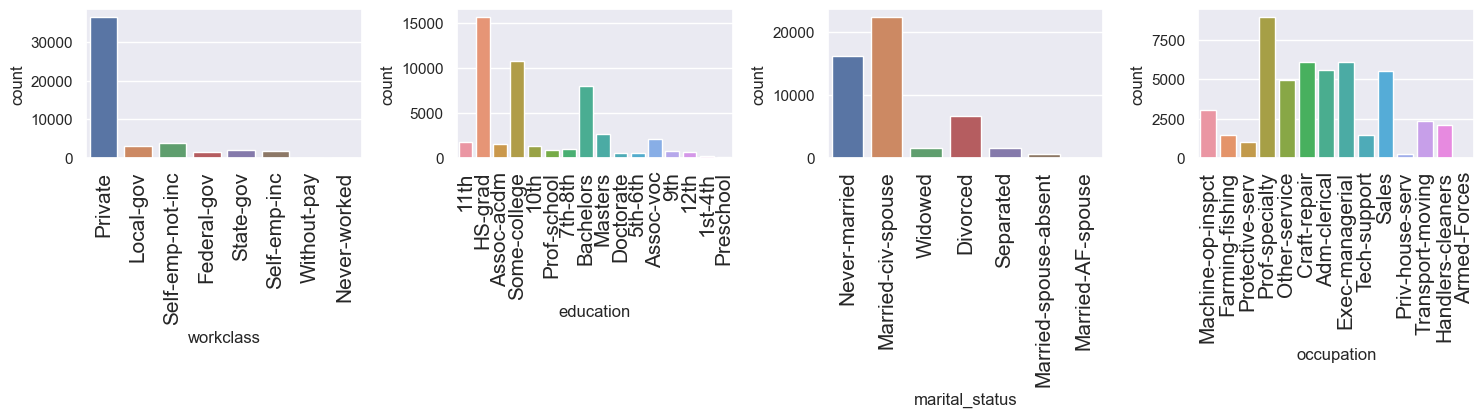

In [76]:
plt.style.use('fivethirtyeight')
sns.set(rc={"figure.figsize":(15,6)})

colmns1 = ['workclass', 'education', 'marital_status', 'occupation']

for i in range(0, len(colmns1)):
    plt.subplot(2,4,i+1)
    sns.countplot(x=data[colmns1[i]])
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()

In [77]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational_num',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

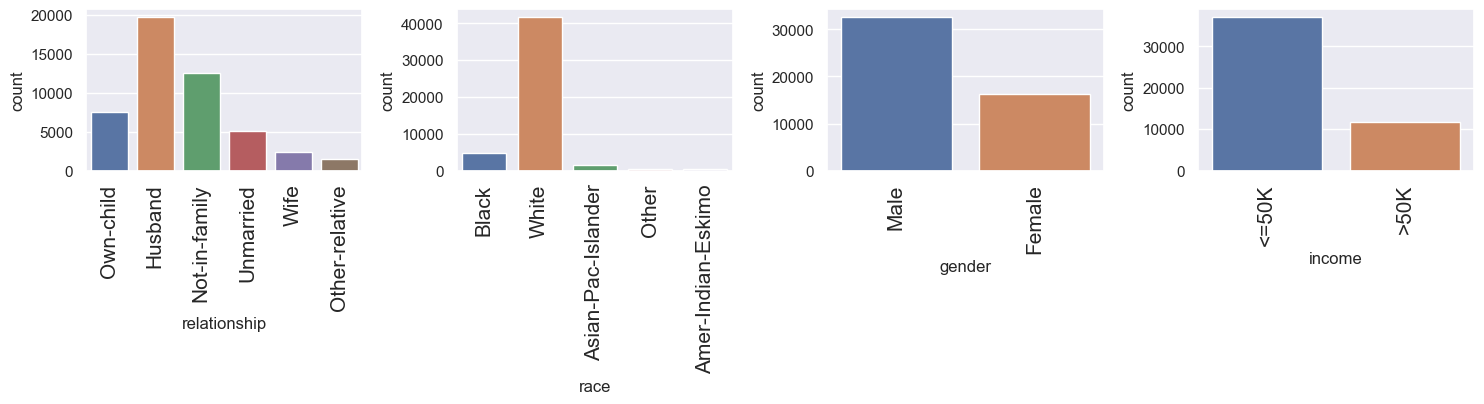

In [78]:
colmns2 = ['relationship', 'race', 'gender', 'income']

for i in range(0, len(colmns2)):
    plt.subplot(2,4,i+1)
    sns.countplot(x=data[colmns2[i]])
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()

In [79]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational_num',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

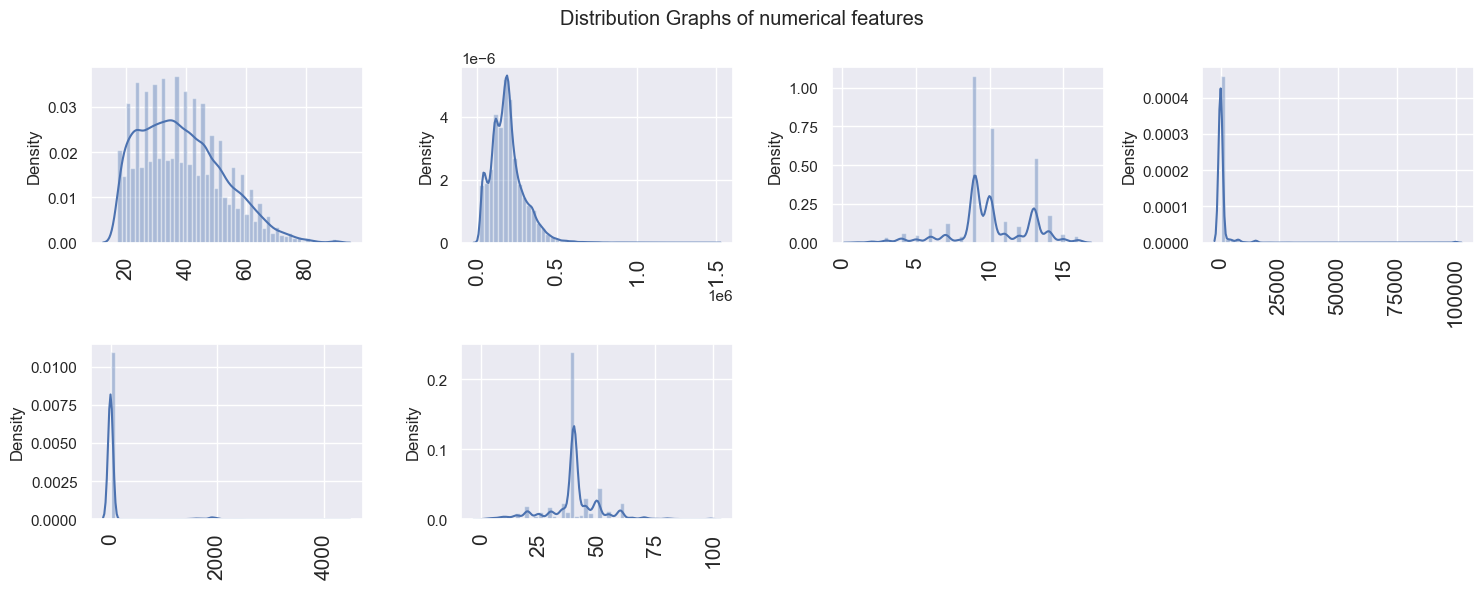

In [80]:
plt.suptitle("Distribution Graphs of numerical features")
for i in range(0, len(numerical_features)):
    plt.subplot(2,4,i+1)
    sns.distplot(x=data[numerical_features[i]])
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()

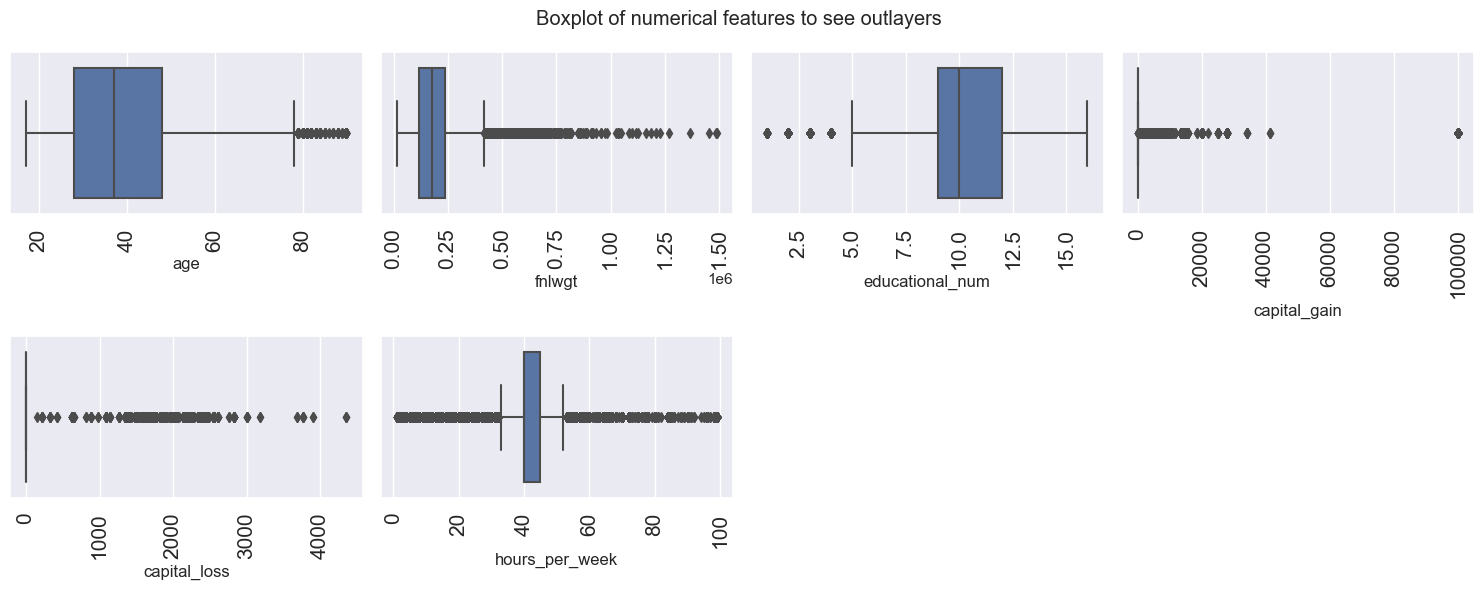

In [81]:
plt.suptitle("Boxplot of numerical features to see outlayers ")
for i in range(0, len(numerical_features)):
    plt.subplot(2,4,i+1)
    sns.boxplot(x=data[numerical_features[i]])
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()

In [82]:
data.head()

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K


<Axes: xlabel='income'>

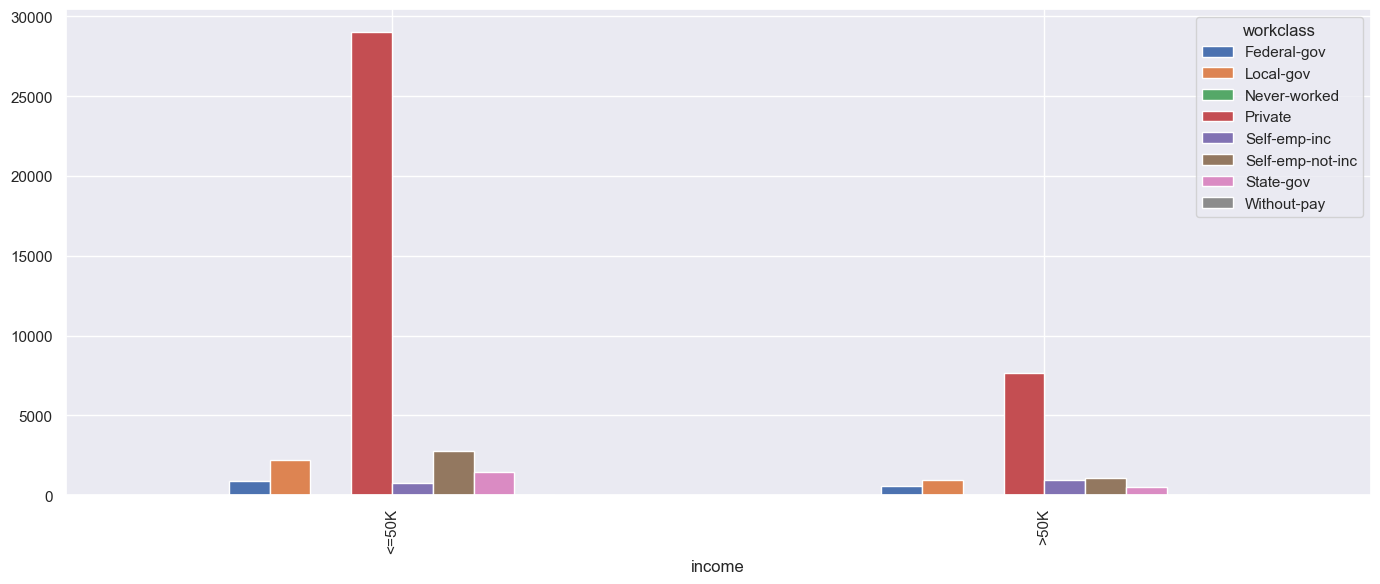

In [83]:
salary = pd.crosstab(data['income'], data['workclass'])
salary.plot(kind='bar')

In [84]:
salary

workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
income,,,,,,,,
<=50K,871,2209,10,29009,756,2784,1451,19
>50K,561,927,0,7646,938,1077,530,2


<Axes: xlabel='income'>

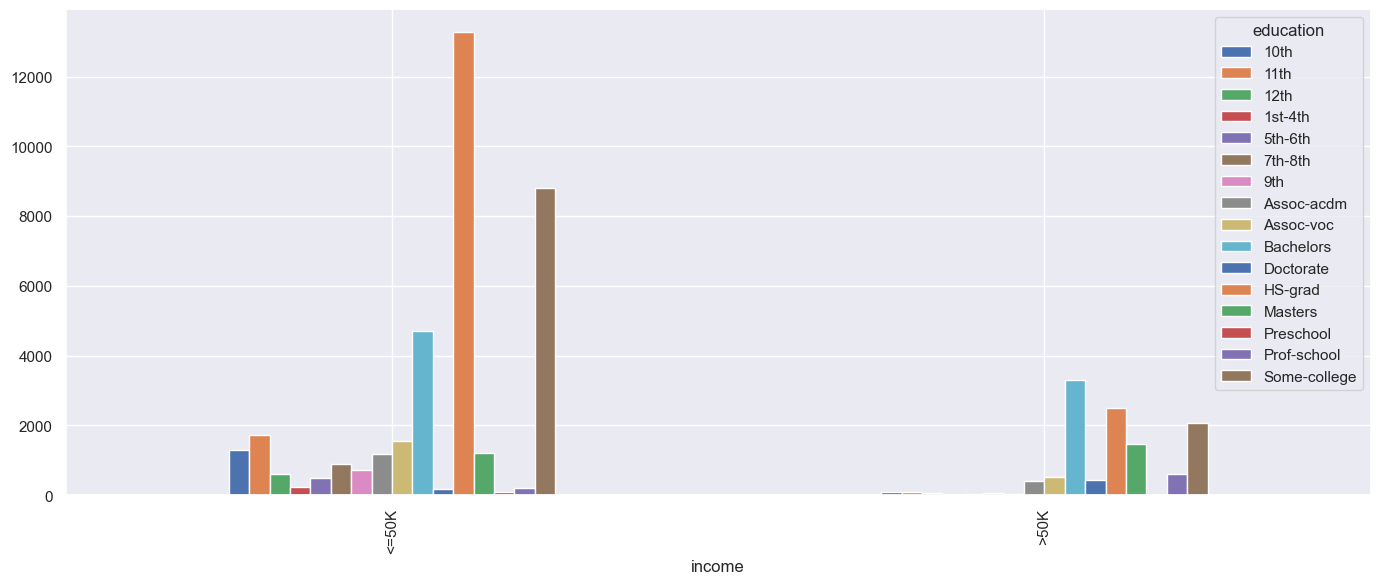

In [85]:
education = pd.crosstab(data['income'], data['education'])
education.plot(kind='bar')

In [86]:
education

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
income,,,,,,,,,,,,,,,,
<=50K,1302,1720,607,237,480,892,715,1188,1538,4702,163,13269,1197,80,217,8802
>50K,87,92,48,8,27,62,41,413,522,3311,431,2501,1459,1,617,2061


<Axes: xlabel='income'>

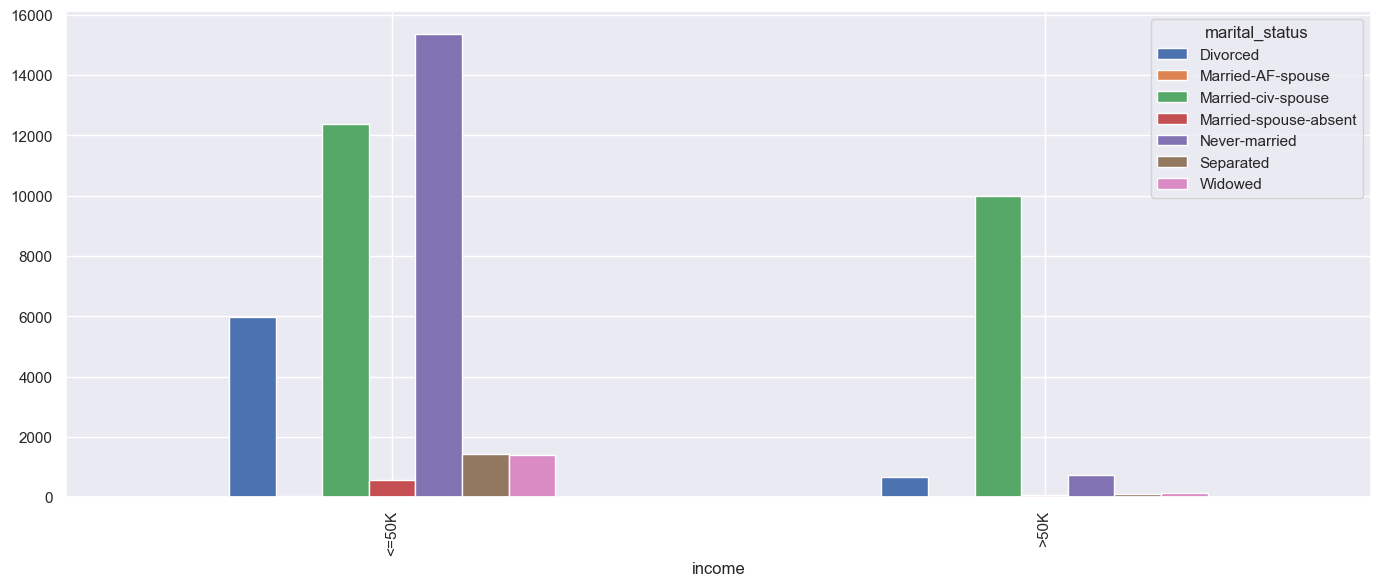

In [87]:
marital_status = pd.crosstab(data['income'], data['marital_status'])
marital_status.plot(kind='bar')

In [88]:
marital_status

marital_status,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
income,,,,,,,
<=50K,5959,23,12388,569,15349,1431,1390
>50K,671,14,9978,58,733,99,128


<Axes: xlabel='income'>

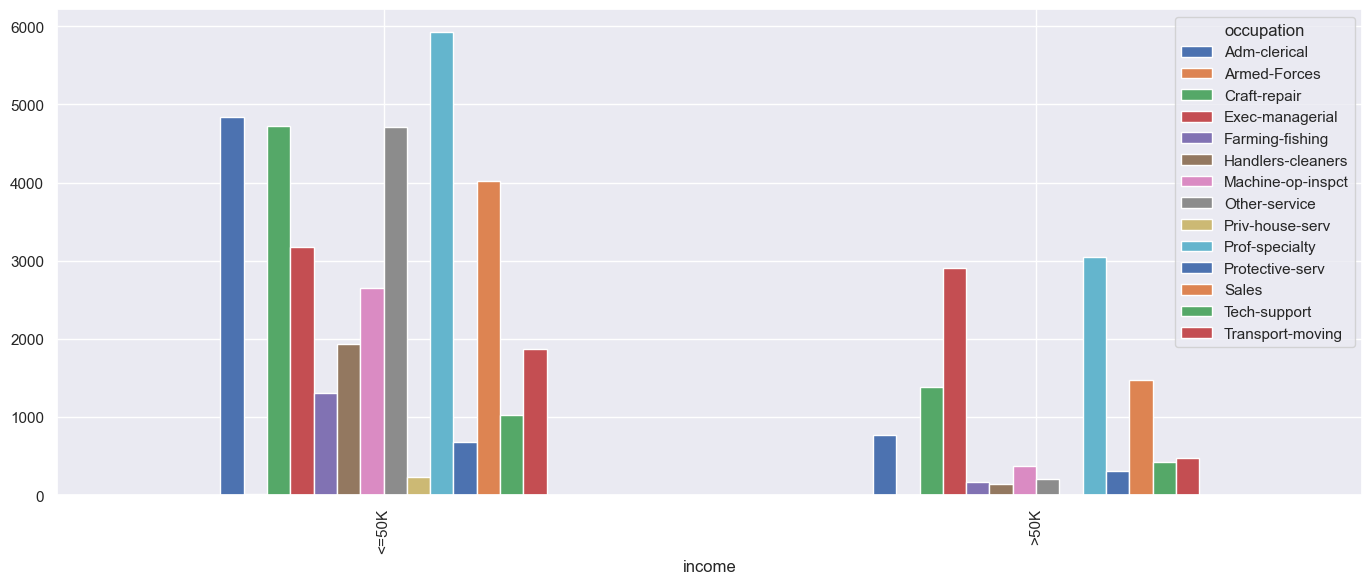

In [89]:
occupation = pd.crosstab(data['income'], data['occupation'])
occupation.plot(kind='bar')

In [90]:
occupation

occupation,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
income,,,,,,,,,,,,,,
<=50K,4838,10,4720,3176,1312,1933,2646,4715,237,5923,674,4026,1025,1874
>50K,768,5,1382,2906,173,138,371,204,3,3047,308,1475,420,481


<Axes: xlabel='income'>

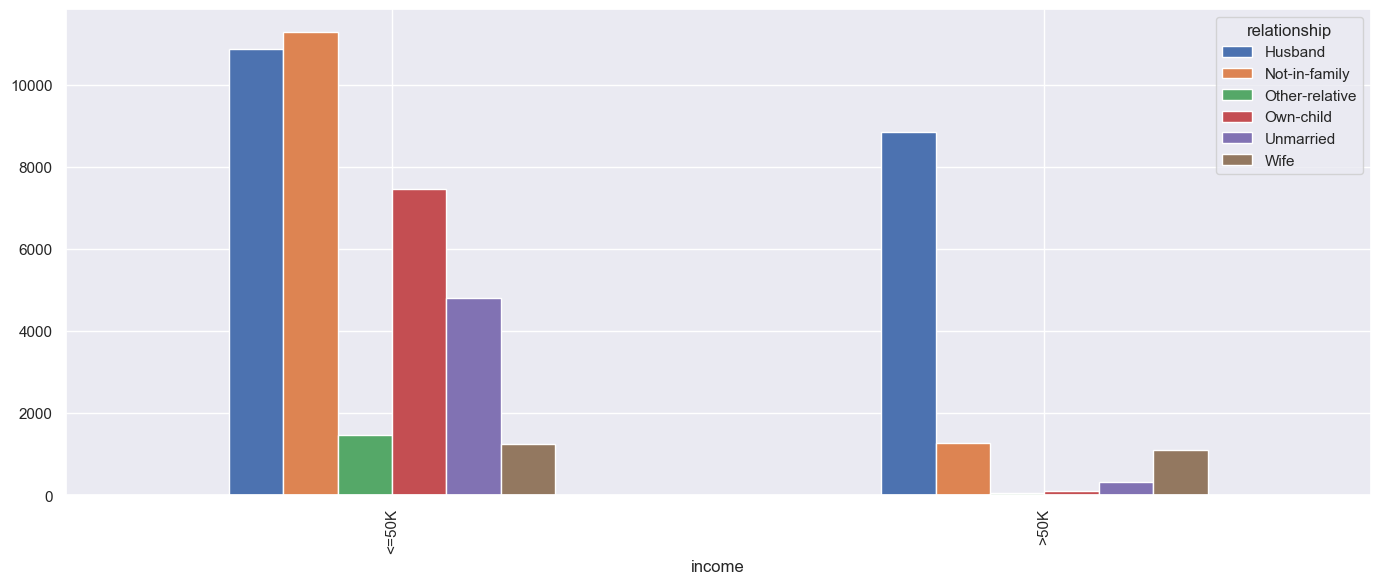

In [91]:
relationship = pd.crosstab(data['income'], data['relationship'])
relationship.plot(kind='bar')

In [92]:
relationship

relationship,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
income,,,,,,
<=50K,10863,11281,1454,7458,4815,1238
>50K,8840,1276,52,111,309,1093


<Axes: xlabel='income'>

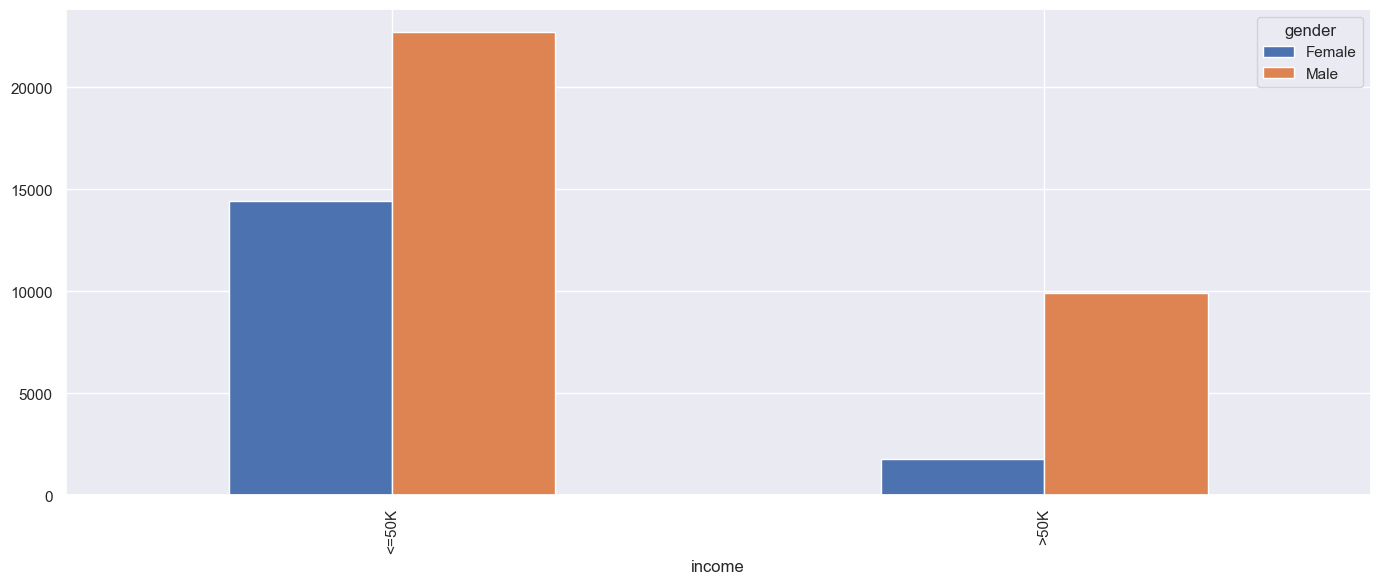

In [93]:
gender = pd.crosstab(data['income'], data['gender'])
gender.plot(kind='bar')

In [94]:
categorical_features

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'gender', 'native_country', 'income'],
      dtype='object')

In [95]:
data.head()

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K


In [96]:
from sklearn.preprocessing import LabelEncoder

# create label encoder object
le = LabelEncoder()

# define the categorical features 
categorical_features = ['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'gender', 'native_country']

# Loop through the categorical features and encode them
for feature in categorical_features:
    le.fit(data[feature])
    data[feature] = le.transform(data[feature])

In [97]:
data['income'] = data['income'].map({'<=50K':0, '>50K':1})

<Axes: >

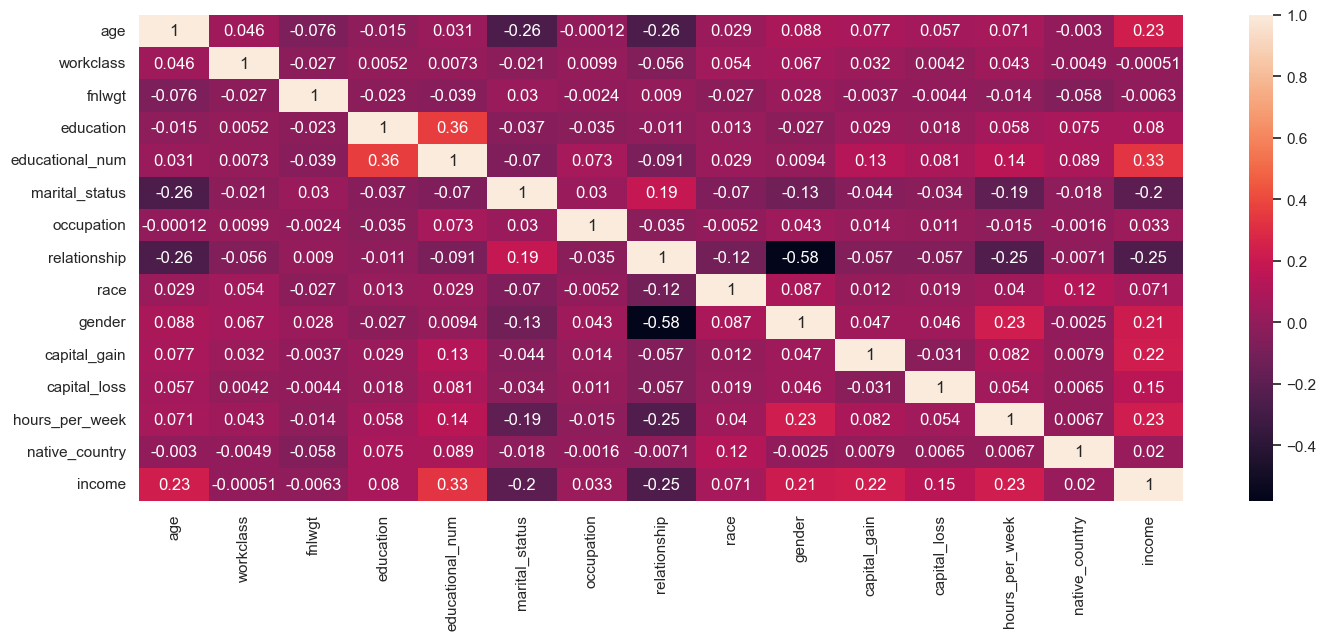

In [98]:
sns.heatmap(data.corr(), annot=True)

In [99]:
data.head()

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,3,226802,1,7,4,6,3,2,1,0,0,40,38,0
1,38,3,89814,11,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,1
3,44,3,160323,15,10,2,6,0,2,1,7688,0,40,38,1
4,18,3,103497,15,10,4,9,3,4,0,0,0,30,38,0


In [100]:
data['income'].value_counts()

income
0    37109
1    11681
Name: count, dtype: int64

In [101]:
# dropping education_num column because we have education ordinal encoded one
data.drop(["education","fnlwgt","native_country"],axis=1,inplace=True)

In [102]:
data.head()

,age,workclass,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,income
0,25,3,7,4,6,3,2,1,0,0,40,0
1,38,3,9,2,4,0,4,1,0,0,50,0
2,28,1,12,2,10,0,4,1,0,0,40,1
3,44,3,10,2,6,0,2,1,7688,0,40,1
4,18,3,10,4,9,3,4,0,0,0,30,0


In [105]:
data.to_csv('data/cleandata.csv',index=False)